In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

In [2]:
df = pd.read_csv("/content/drive/MyDrive/2025-2 MLP/source/wine+quality/winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [4]:
x = df.drop("quality", axis=1)
y = df["quality"]
x, y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0              0.27         0.36            20.7      0.045   
 1               6.3              0.30         0.34             1.6      0.049   
 2               8.1              0.28         0.40             6.9      0.050   
 3               7.2              0.23         0.32             8.5      0.058   
 4               7.2              0.23         0.32             8.5      0.058   
 ...             ...               ...          ...             ...        ...   
 4893            6.2              0.21         0.29             1.6      0.039   
 4894            6.6              0.32         0.36             8.0      0.047   
 4895            6.5              0.24         0.19             1.2      0.041   
 4896            5.5              0.29         0.30             1.1      0.022   
 4897            6.0              0.21         0.38             0.8      0.020   
 
       free su

In [5]:
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
X = x.values
X

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [7]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [23]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(256)(inputs)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.ReLU()(x)

outputs = tf.keras.layers.Dense(7, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_15 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_16 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,407 (337.53 KB)

 Trainable params: 86,407 (337.53 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_15 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_16 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,407 (337.53 KB)

 Trainable params: 86,407 (337.53 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100)


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4637 - loss: 1.1390 - val_accuracy: 0.4974 - val_loss: 1.0809
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4996 - loss: 1.1155 - val_accuracy: 0.4821 - val_loss: 1.1547
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5147 - loss: 1.1249 - val_accuracy: 0.4936 - val_loss: 1.1223
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4905 - loss: 1.1284 - val_accuracy: 0.4796 - val_loss: 1.1040
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4898 - loss: 1.1216 - val_accuracy: 0.4821 - val_loss: 1.1003
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5003 - loss: 1.0945 - val_accuracy: 0.5230 - val_loss: 1.1043
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5135 - loss: 1.0930 - val_accuracy: 0.4885 - val_loss: 1.1142
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4986 - loss: 1.1050 - val_accuracy: 0.5217 - v

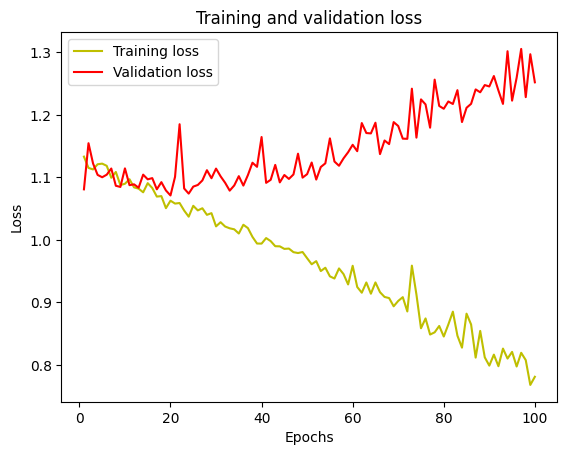

In [29]:
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

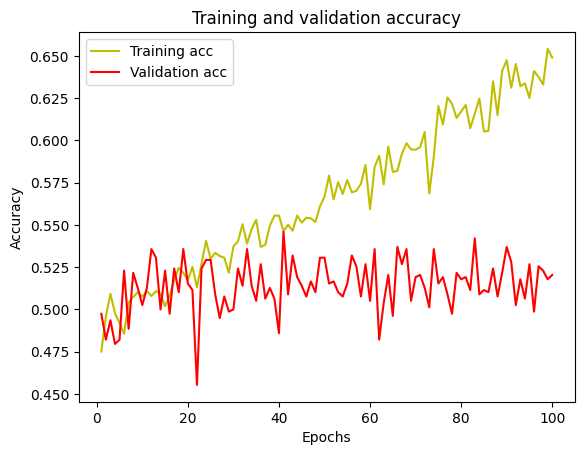

In [30]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.35      0.16      0.22        51
           2       0.50      0.56      0.53       295
           3       0.50      0.58      0.54       409
           4       0.50      0.35      0.41       183
           5       0.23      0.15      0.18        33

    accuracy                           0.49       980
   macro avg       0.35      0.30      0.31       980
weighted avg       0.48      0.49      0.48       980

[[  0   1   3   5   0   0]
 [  2   8  28  12   1   0]
 [  2   7 165 109  11   1]
 [  0   6 111 238  46   8]
 [  1   1  19  90  64   8]
 [  0   0   2  20   6   5]]
